\newpage

## Question 1

1. Classification Problem Identification: Define and describe a classification problem based
on the dataset.

In [2]:
import pandas as pd

kidney = pd.read_csv("C:/Users/gxnnm/Downloads/Stats3DA3/kidney_disease.csv")

In [3]:
kidney.head(), kidney.info(), kidney.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

(   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
 0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
 1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
 2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
 3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
 4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
 
    ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
 0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
 1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
 2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
 3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
 4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  
 
 [5 rows x 26 columns],
 None,
                id         age          bp     

The objective of this data set is to predict whether a patient has chronic kidney disease based on various clinical features.

The variables are:
Demographics: Age, Blood Pressure (bp)
Specific Gravity (sg): A measure related to the density of urine.
Albumin Levels (al), Sugar Levels (su): Indicators in the urine suggesting kidney function.
Red Blood Cell Count (rbc), Pus Cell (pc), and other cellular compositions in the urine.
Blood Glucose Random (bgr), Blood Urea (bu), Serum Creatinine (sc): Laboratory measurements indicating kidney function.
Sodium (sod), Potassium (pot), Hemoglobin (hemo): Electrolyte levels and blood parameters.
Hypertension (htn), Diabetes Mellitus (dm), Coronary Artery Disease (cad): Presence of these conditions which are risk factors for CKD.
Appetite (appet), Pedal Edema (pe), Anemia (ane): Symptoms that are often associated with CKD.

And the classification is whether the patient has chronic kidney disease or not.

2. Variable Transformation: Implement any transformations chosen or justify the absence
of such modifications.

In [6]:
num_col = kidney.select_dtypes(include={'float64'}).columns
obj_col = kidney.select_dtypes(include={'object'}).columns

binary_mapping = {
    'rbc':{'normal':1, 'abnormal':0},
    'pc' :{'normal':1, 'abnormal':0},
    'pcc' :{'present':1, 'notpresent':0},
    'ba' :{'present':1, 'notpresent':0},
    'htn':{'yes':1, 'no':0},
    'dm' :{'yes':1, 'no':0},
    'cad' :{'yes':1, 'no':0},
    'pe' :{'yes':1, 'no':0},
    'ane' :{'yes':1, 'no':0},
    'appet' :{'good':1, 'poor':0},
}

for column, binary_mapping in binary_mapping.items():
    kidney[column] = kidney[column].replace(binary_mapping)

In [7]:
kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,0.0,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0,0,1.0,0.0,0.0,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,1.0,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,1.0,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,0.0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,47,6700,4.9,0.0,0,0,1.0,0.0,0.0,notckd
396,396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,54,7800,6.2,0.0,0,0,1.0,0.0,0.0,notckd
397,397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,...,49,6600,5.4,0.0,0,0,1.0,0.0,0.0,notckd
398,398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,...,51,7200,5.9,0.0,0,0,1.0,0.0,0.0,notckd


In [10]:
from sklearn.preprocessing import StandardScaler

kidney[num_col] = StandardScaler().fit_transform(kidney[num_col])
kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,0.0,ckd
1,1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0,0,1.0,0.0,0.0,ckd
2,2,0.613295,0.258373,-1.297699,0.727772,2.323069,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,1.0,ckd
3,3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,1.0,ckd
4,4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,0.0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,0.205078,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,...,47,6700,4.9,0.0,0,0,1.0,0.0,0.0,notckd
396,396,-0.553039,-0.473370,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,...,54,7800,6.2,0.0,0,0,1.0,0.0,0.0,notckd
397,397,-2.302541,0.258373,0.454071,-0.752868,-0.410106,1.0,1.0,0.0,0.0,...,49,6600,5.4,0.0,0,0,1.0,0.0,0.0,notckd
398,398,-2.010957,-1.205114,1.329955,-0.752868,-0.410106,1.0,1.0,0.0,0.0,...,51,7200,5.9,0.0,0,0,1.0,0.0,0.0,notckd


3. Dataset Overview: Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

In [11]:
kidney.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,htn,appet,pe,ane
count,400.000000,3.910000e+02,388.000000,3.530000e+02,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,3.560000e+02,381.000000,383.000000,3.130000e+02,3.120000e+02,3.480000e+02,398.000000,399.000000,399.000000,399.000000
mean,199.500000,3.634490e-17,0.000000,-4.025738e-17,0.000000,0.000000,0.810484,0.773134,0.106061,0.055556,3.991813e-17,0.000000,0.000000,2.270105e-17,5.693451e-18,4.083579e-17,0.369347,0.794486,0.190476,0.150376
std,115.614301,1.001281e+00,1.001291,1.001419e+00,1.001415,1.001428,0.392711,0.419431,0.308305,0.229351,1.001407e+00,1.001315,1.001308,1.001601e+00,1.001606e+00,1.001440e+00,0.483235,0.404584,0.393170,0.357888
min,0.000000,-2.885708e+00,-1.936857,-2.173584e+00,-0.752868,-0.410106,0.000000,0.000000,0.000000,0.000000,-1.591967e+00,-1.108830,-0.466102,-1.280094e+01,-6.671023e-01,-3.241109e+00,0.000000,0.000000,0.000000,0.000000
25%,99.750000,-5.530393e-01,-0.473370,-1.297699e+00,-0.752868,-0.410106,1.000000,1.000000,0.000000,0.000000,-6.193803e-01,-0.603246,-0.378897,-2.433340e-01,-2.594231e-01,-7.655198e-01,0.000000,1.000000,0.000000,0.000000
50%,199.500000,2.050779e-01,0.258373,4.540705e-01,-0.752868,-0.410106,1.000000,1.000000,0.000000,0.000000,-3.414983e-01,-0.305843,-0.309133,4.534651e-02,-7.126345e-02,4.248496e-02,0.000000,1.000000,0.000000,0.000000
75%,299.250000,7.590867e-01,0.258373,4.540705e-01,0.727772,-0.410106,1.000000,1.000000,0.000000,0.000000,1.890038e-01,0.170001,-0.047519,4.302539e-01,8.553625e-02,8.504897e-01,1.000000,1.000000,0.000000,0.000000
max,399.000000,2.246163e+00,7.575807,1.329955e+00,2.948733,4.145186,1.000000,1.000000,1.000000,1.000000,4.319341e+00,6.613723,12.719271,2.451017e+00,1.328807e+01,1.813219e+00,1.000000,1.000000,1.000000,1.000000


In [13]:
kidney.shape

(400, 26)

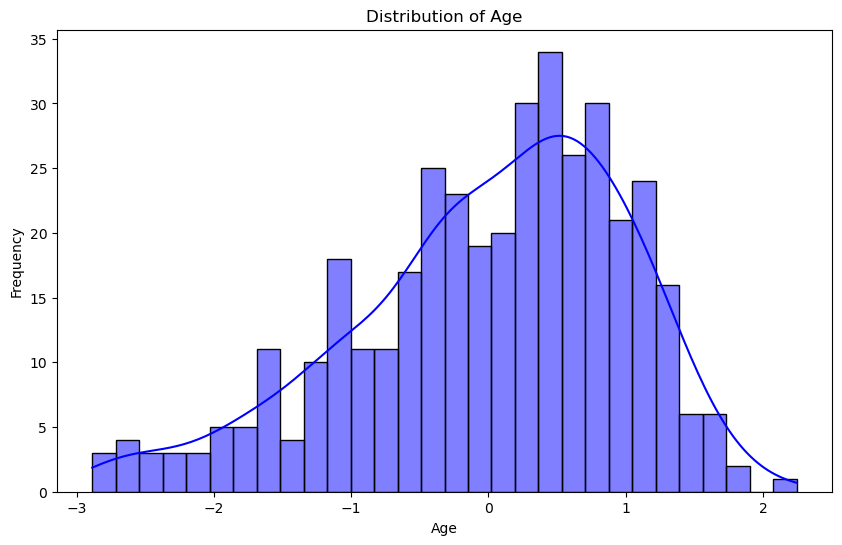

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(kidney['age'], kde=True, color="blue", bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Variables and Data Types:
The dataset now consists of 26 columns, including both original and derived features.
Numerical Features: age, bp, sg, al, su, bgr, bu, sc, sod, pot, hemoand 3 corrected numerical features pcv, wc, rc. 
Categorical Features: rbc, pc, pcc, ba, htn, dm, cad, appet, pe, ane.
Target Variable: The classification variable, which indicates whether a patient has chronic kidney disease (ckd) or not, is the primary target for prediction.

Observation Counts:
The dataset comprises 400 entries. 

Distubution:
From the graph we can see, the age of this data set is left skewed.

4. Association Between Variables: Analyze variable relationships and their implications for
feature selection or extraction (at least three statements).

<Axes: >

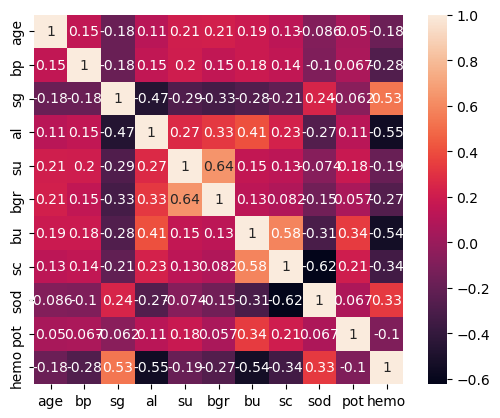

In [17]:
kidney_float = kidney[num_col]
kidney_float = kidney_float.apply(lambda x: x.fillna(x.mean()),axis = 0)

corrlation_mat = kidney_float.corr()

sns.heatmap(corrlation_mat,annot = True, cbar = True, square = True)

The variables sg and hemo show a strong negative correlation with al, indicating that as the concentration of albumin in the urine increases, both the specific gravity of urine and the hemoglobin level tend to decrease.
bgr and su are positively correlated, indicating higher blood glucose will naturally be associated with higher levels of sugar in the urine.

\newpage

## Question 2

We consider [Spotify Tracks DB dataset from Kaggle](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) for the following analysis. 

(a) We find the dimension of the Spotify dataset.

In [ ]:
# code 

There are xxx observations and xxx variables.

## 3. Helper's name.

Helper's full name